In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso ,Ridge
from sklearn.metrics import r2_score,mean_absolute_error
import pickle 
import os
import seaborn as sns

In [3]:
path = "D:/singapore_flat_sale_prediction" 
all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

df_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='ISO-8859-1')
    df_list.append(df)
df= pd.concat(df_list, axis=0, ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
df["storey_range"].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [5]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [6]:
for i in df.columns:
    print(i,"--->",df[i].dtype)

month ---> object
town ---> object
flat_type ---> object
block ---> object
street_name ---> object
storey_range ---> object
floor_area_sqm ---> float64
flat_model ---> object
lease_commence_date ---> int64
resale_price ---> float64
remaining_lease ---> object


In [7]:
for i in df.columns:
    print(i,"-->",df[i].isna().sum())

month --> 0
town --> 0
flat_type --> 0
block --> 0
street_name --> 0
storey_range --> 0
floor_area_sqm --> 0
flat_model --> 0
lease_commence_date --> 0
resale_price --> 0
remaining_lease --> 1635983


In [8]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [9]:
print("DATA STARTS FROM --")
print(df.loc[:,"month"][0])

DATA STARTS FROM --
1990-01


In [10]:
print("ENDs at --")
print(df.loc[:,"month"][len(df)-1])


ENDs at --
2014-12


In [11]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [12]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,1.853866e+06,1.853866e+06,1.853866e+06
mean,9.569146e+01,1.988273e+03,3.206780e+05
std,2.582567e+01,1.065907e+01,1.703608e+05
min,2.800000e+01,1.966000e+03,5.000000e+03
25%,7.300000e+01,1.981000e+03,1.930000e+05
50%,9.300000e+01,1.986000e+03,2.970000e+05
75%,1.130000e+02,1.996000e+03,4.180000e+05
max,3.070000e+02,2.022000e+03,1.568888e+06


In [13]:
df=df.drop(columns="remaining_lease")

In [14]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [15]:
#df.to_csv('D:/singapore_flat_sale_prediction/singaporeflatsdataframe.csv', index=False)

# label encoding for categorical data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853866 entries, 0 to 1853865
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   month                object 
 1   town                 object 
 2   flat_type            object 
 3   block                object 
 4   street_name          object 
 5   storey_range         object 
 6   floor_area_sqm       float64
 7   flat_model           object 
 8   lease_commence_date  int64  
 9   resale_price         float64
dtypes: float64(2), int64(1), object(7)
memory usage: 141.4+ MB


## Deploying individual label encoder

In [17]:
monthle = LabelEncoder()
townle=LabelEncoder()
flatyple=LabelEncoder()
blockle=LabelEncoder()
streetle=LabelEncoder()
rangele=LabelEncoder()
flatmodelle=LabelEncoder()

In [18]:
df["month"]=monthle.fit_transform(df["month"])
df["town"]=townle.fit_transform(df["town"])
df["flat_type"]=flatyple.fit_transform(df["flat_type"])
df["block"]=blockle.fit_transform(df["block"])
df["street_name"]=streetle.fit_transform(df["street_name"])
df["storey_range"]=rangele.fit_transform(df["storey_range"])
df["flat_model"]=flatmodelle.fit_transform(df["flat_model"])
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,0,0,0,830,13,5,31.0,7,1977,9000.0
1,0,0,0,830,13,2,31.0,7,1977,6000.0
2,0,0,0,830,13,5,31.0,7,1977,8000.0
3,0,0,0,830,13,4,31.0,7,1977,6000.0
4,0,0,2,447,13,2,73.0,20,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
1853861,299,26,4,2349,575,5,122.0,9,1988,580000.0
1853862,299,26,5,908,561,5,146.0,15,1988,540000.0
1853863,299,26,5,1785,563,4,164.0,5,1992,738000.0
1853864,299,26,5,672,567,4,152.0,15,1985,592000.0


## correlation heatmap

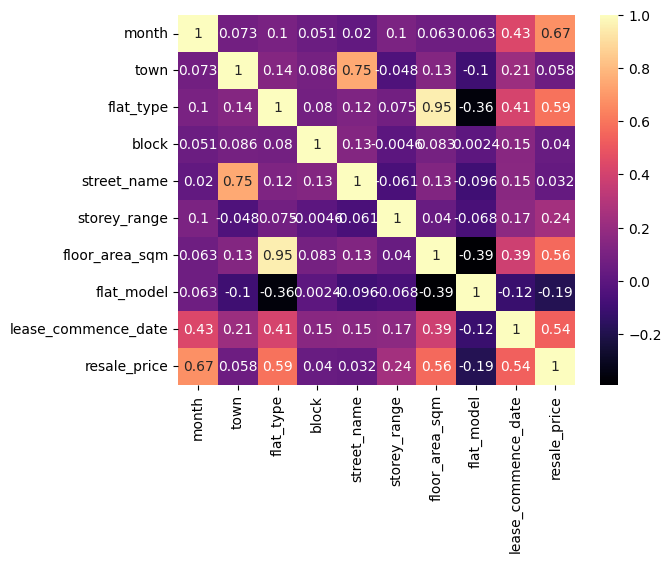

In [19]:
sns.heatmap(df.corr(),cmap='magma',annot=True)
plt.show()

## Defining the target and independent variable

In [20]:
Y = df['resale_price'].values
X= df[['month','town',
         'flat_type','block','street_name',
         'storey_range','floor_area_sqm','flat_model','lease_commence_date']].values

In [21]:
X

array([[   0.,    0.,    0., ...,   31.,    7., 1977.],
       [   0.,    0.,    0., ...,   31.,    7., 1977.],
       [   0.,    0.,    0., ...,   31.,    7., 1977.],
       ...,
       [ 299.,   26.,    5., ...,  164.,    5., 1992.],
       [ 299.,   26.,    5., ...,  152.,   15., 1985.],
       [ 299.,   26.,    5., ...,  146.,   15., 1985.]])

## training the model  

In [22]:
x_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.26,random_state=0)

In [23]:
X_test

array([[ 146.,    8.,    5., ...,  143.,    5., 1993.],
       [ 206.,    3.,    2., ...,   67.,   21., 1985.],
       [ 114.,   19.,    3., ...,   84.,    7., 1974.],
       ...,
       [ 169.,   10.,    3., ...,   91.,   21., 1980.],
       [ 146.,    4.,    2., ...,   63.,    9., 1973.],
       [  57.,    4.,    4., ...,  131.,   12., 1984.]])

## Initialing DECISION TREE REGRESSOR MODEL

In [24]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,Y_train)

DecisionTreeRegressor()

In [25]:
y_pred = dtr.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 5186.19


In [26]:
dtrscore=r2_score(Y_test,y_pred)
print(dtrscore)

0.9926811104428885


## Initialising RANDOM FOREST REGRESSOR

In [27]:
rfrmodel=RandomForestRegressor(n_estimators=5)
rfrmodel.fit(x_train,Y_train)
Ypredrfr=rfrmodel.predict(X_test)
rfrscore=r2_score(Y_test,Ypredrfr)
print(rfrscore)

0.9923203241644473


In [28]:
lassomodel=Lasso(alpha=0.3)
lassomodel.fit(x_train,Y_train)
ypredlg=lassomodel.predict(X_test)
lgr2score=r2_score(Y_test,ypredlg)
lgr2score

0.7637575691092705

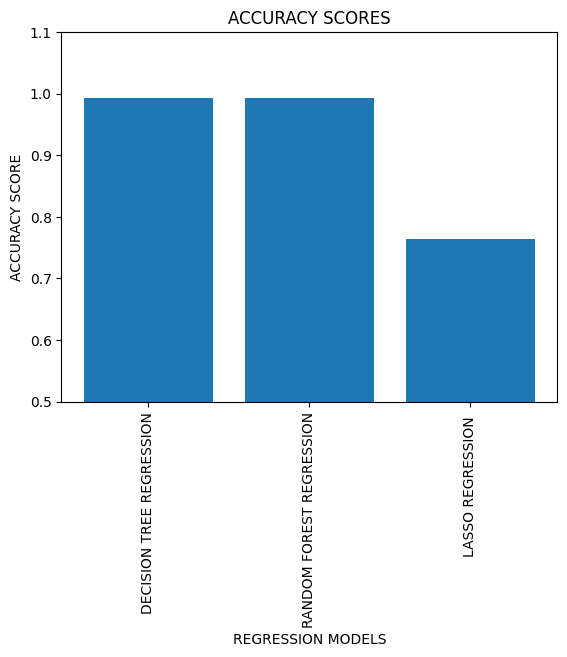

In [29]:
models = ['DECISION TREE REGRESSION', 'RANDOM FOREST REGRESSION',"LASSO REGRESSION "]
scores= [dtrscore,rfrscore ,lgr2score]

plt.bar(models, scores)
plt.xlabel('REGRESSION MODELS')
plt.xticks(rotation=90)
plt.ylim(0.5,top=1.1)
plt.ylabel('ACCURACY SCORE')
plt.title('ACCURACY SCORES')

# Show the plot
plt.show()

## model validation

In [30]:
print(Y_test[133])
X_test[133]

75000.0


array([  48.,   11.,    2.,  376.,  208.,    5.,   59.,    7., 1975.])

In [31]:
Xnew = np.array(X_test[133])
print(Xnew)


[  48.   11.    2.  376.  208.    5.   59.    7. 1975.]


In [32]:
X_reshaped = Xnew.reshape(1, -1)
y_predp = rfrmodel.predict(X_reshaped)
y_predp[0]

70000.0

In [33]:
value=y_predp[0]
value

70000.0

In [34]:
rfrmodel

RandomForestRegressor(n_estimators=5)

In [35]:
sampledf={"month":['2017-01'],"town":['ANG MO KIO'],"flat_type":['3 ROOM'],"block":['403'],"street_name":['ANG MO KIO AVE 10'],
          "storey_range":['10 TO 12'],
          "floor_area_sqm":[67.0],"flat_model":['NEW GENERATION'],"lease_commence_date":[1979]}

In [36]:
newdf1=pd.DataFrame(sampledf) 
newdf1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date
0,2017-01,ANG MO KIO,3 ROOM,403,ANG MO KIO AVE 10,10 TO 12,67.0,NEW GENERATION,1979


In [37]:
newdf1["month"]=monthle.transform(newdf1["month"]) 
newdf1["town"]=townle.transform(newdf1["town"]) 
newdf1["flat_type"]=flatyple.transform(newdf1["flat_type"]) 
newdf1["block"]=blockle.transform(newdf1["block"]) 
newdf1["street_name"]=streetle.transform(newdf1["street_name"]) 
newdf1["storey_range"]=rangele.transform(newdf1["storey_range"]) 
newdf1["flat_model"]=flatmodelle.transform(newdf1["flat_model"]) 

newdf1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date
0,324,0,2,1110,14,5,67.0,20,1979


In [38]:
pred=rfrmodel.predict(newdf1)
pred[0]

C:\Users\puliv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


307600.0

In [39]:
'''with open('D:/singapore_flat_sale_prediction/RANDOMFORESTmodel.pkl', 'wb') as file:
    pickle.dump(rfrmodel, file)

with open('D:/singapore_flat_sale_prediction/monthlabelencoder.pkl', 'wb') as file:
    pickle.dump(monthle, file)
with open('D:/singapore_flat_sale_prediction/townlabelencoder.pkl', 'wb') as file:
    pickle.dump(townle, file)
with open('D:/singapore_flat_sale_prediction/flattypelabelencoder.pkl', 'wb') as file:
    pickle.dump(flatyple, file)
with open('D:/singapore_flat_sale_prediction/blocklabelencoder.pkl', 'wb') as file:
    pickle.dump(blockle, file)
with open('D:/singapore_flat_sale_prediction/streetlabelencoder.pkl', 'wb') as file:
    pickle.dump(streetle, file)
with open('D:/singapore_flat_sale_prediction/flatrangelabelencoder.pkl', 'wb') as file:
    pickle.dump(rangele, file) 
with open('D:/singapore_flat_sale_prediction/flatmodellabelencoder.pkl', 'wb') as file:
    pickle.dump(flatmodelle, file) '''

"with open('D:/singapore_flat_sale_prediction/RANDOMFORESTmodel.pkl', 'wb') as file:\n    pickle.dump(rfrmodel, file)\n\nwith open('D:/singapore_flat_sale_prediction/monthlabelencoder.pkl', 'wb') as file:\n    pickle.dump(monthle, file)\nwith open('D:/singapore_flat_sale_prediction/townlabelencoder.pkl', 'wb') as file:\n    pickle.dump(townle, file)\nwith open('D:/singapore_flat_sale_prediction/flattypelabelencoder.pkl', 'wb') as file:\n    pickle.dump(flatyple, file)\nwith open('D:/singapore_flat_sale_prediction/blocklabelencoder.pkl', 'wb') as file:\n    pickle.dump(blockle, file)\nwith open('D:/singapore_flat_sale_prediction/streetlabelencoder.pkl', 'wb') as file:\n    pickle.dump(streetle, file)\nwith open('D:/singapore_flat_sale_prediction/flatrangelabelencoder.pkl', 'wb') as file:\n    pickle.dump(rangele, file) \nwith open('D:/singapore_flat_sale_prediction/flatmodellabelencoder.pkl', 'wb') as file:\n    pickle.dump(flatmodelle, file) "

# saved the model and encoders